In [1]:
import jax
import jax.numpy as jnp
import jax.random as random
import optax
from matplotlib import pyplot as plt
from tqdm import tqdm

from modules import Transformer

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!
2024-03-01 22:24:59.195826: W pjrt_plugin/src/mps_client.cc:563] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


Metal device set to: Apple M2 Pro


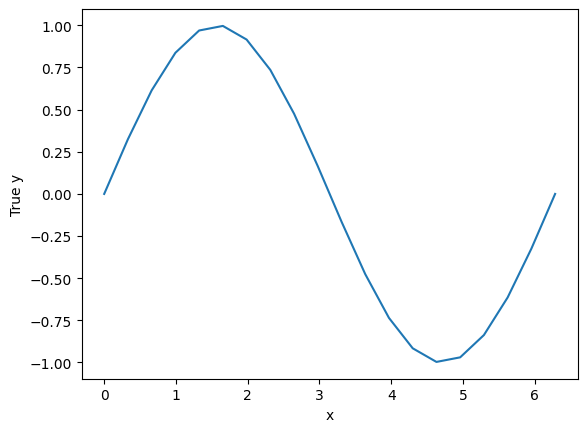

In [2]:
seq_length = 20
embed_dim = 1
learning_rate = 0.05

x = jnp.linspace(0, 2 * jnp.pi, seq_length)[:, jnp.newaxis]
y = jnp.sin(x)
plt.plot(x[:, 0], y)
plt.ylabel("True y")
plt.xlabel("x")
plt.show()

0.000: 100%|██████████| 200/200 [00:22<00:00,  8.83it/s]


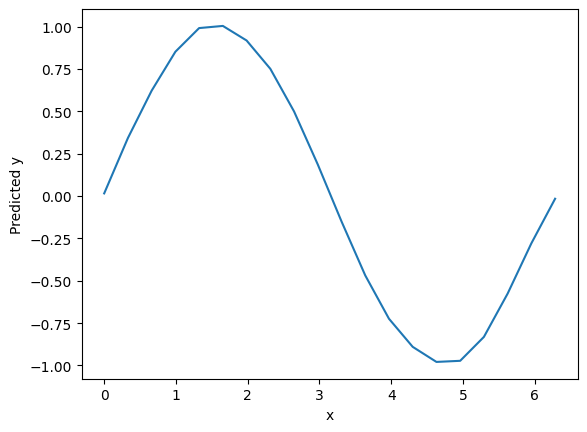

In [3]:
model = Transformer(
    num_blocks=3,
    num_heads=1,
    output_dim=1,
    embed_dim=10
)
params = model.init(random.key(0), x)
tx = optax.adamw(learning_rate)
opt_state = tx.init(params)


@jax.jit
def mse(params, x, y):
    return jnp.mean((y - model.apply(params, x)) ** 2)


loss_grad_fn = jax.value_and_grad(mse)

for i in (pbar := tqdm(range(200))):
    loss_val, grads = loss_grad_fn(params, x, y)
    updates, opt_state = tx.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    pbar.set_description(f"{loss_val:.3f}")

y_pred = model.apply(params, x)
plt.plot(x[:, 0], y_pred[:, 0])
plt.ylabel("Predicted y")
plt.xlabel("x")
plt.show()
plt.show()